In [1]:
import matplotlib.pylab as plt
import tables as tb
from Histogram import Histogram as hist
from PDF import PDF
import numpy as np

#IC class for fitting
import fitFunctions as ff

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
f = tb.open_file("../Data/pull_data.h5", "r")
pull_list = f.root.pull_list[:]


In [3]:
fun = ff.gauss
lim = 5
xp = np.linspace(-lim,lim,1000)

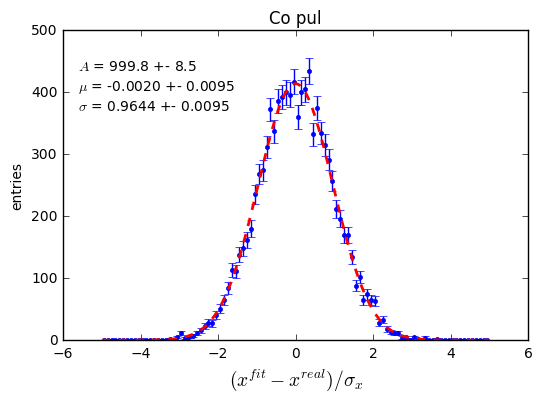

In [4]:
pull_Co = pull_list[:,0]
h_co = np.histogram(pull_Co,bins=100,range=[-lim,lim])
fit_co = ff.fit_gauss(h_co[1][:-1] + np.diff(h_co[1])/2.,h_co[0],[100,0,1])
res_co = [fit_co[0], 0]
res_co[1] = np.sqrt(np.diag(fit_co[1]))

plt.errorbar(h_co[1][:-1] + np.diff(h_co[1])/2.,h_co[0],h_co[0]**0.5,marker='.',linestyle='None')
plt.plot(xp, fun(xp,res_co[0][0],res_co[0][1],res_co[0][2]),linewidth=2,color='red',linestyle='--')
plt.figtext(0.15,0.8, ('$A$ = %0.1f +- %0.1f' % (res_co[0][0] , res_co[1][0])))
plt.figtext(0.15,0.75, ('$\mu$ = %0.4f +- %0.4f' % (res_co[0][1] , res_co[1][1])))
plt.figtext(0.15,0.7, ('$\sigma$ = %0.4f +- %0.4f' % (res_co[0][2] , res_co[1][2])))
plt.title('Co pul')
plt.xlabel(r'$({x^{fit}-x^{real}})/{\sigma_x}$',fontsize=14)
plt.ylabel('entries')
plt.savefig("../Outputs/Co_pull.pdf")

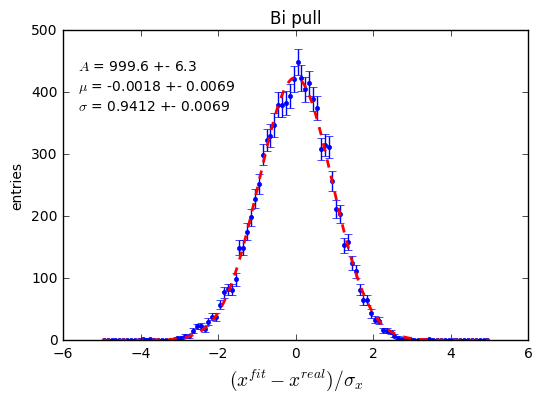

In [5]:
pull_Bi = pull_list[:,2]
h_bi = np.histogram(pull_Bi,bins=100,range=[-lim,lim])
fit_bi = ff.fit_gauss(h_bi[1][:-1] + np.diff(h_bi[1])/2.,h_bi[0],[100,0,1])
res_bi = [fit_bi[0], 0]
res_bi[1] = np.sqrt(np.diag(fit_bi[1]))

plt.errorbar(h_bi[1][:-1] + np.diff(h_bi[1])/2.,h_bi[0],h_bi[0]**0.5,marker='.',linestyle='None')
plt.plot(xp, fun(xp,res_bi[0][0],res_bi[0][1],res_bi[0][2]),linewidth=2,color='red',linestyle='--')
plt.figtext(0.15,0.8, ('$A$ = %0.1f +- %0.1f' % (res_bi[0][0] , res_bi[1][0])))
plt.figtext(0.15,0.75, ('$\mu$ = %0.4f +- %0.4f' % (res_bi[0][1] , res_bi[1][1])))
plt.figtext(0.15,0.7, ('$\sigma$ = %0.4f +- %0.4f' % (res_bi[0][2] , res_bi[1][2])))
plt.title('Bi pull')
plt.xlabel(r'$({x^{fit}-x^{real}})/{\sigma_x}$',fontsize=14)
plt.ylabel('entries')
plt.savefig("../Outputs/Bi_pull.pdf")

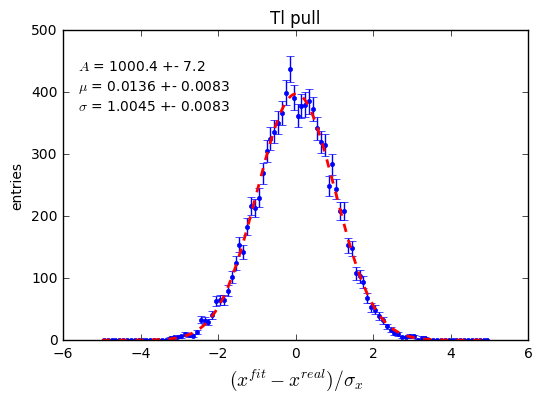

In [6]:
pull_Tl = pull_list[:,3]
h_tl = np.histogram(pull_Tl,bins=100,range=[-lim,lim])
fit_tl = ff.fit_gauss(h_tl[1][:-1] + np.diff(h_tl[1])/2.,h_tl[0],[100,0,1])
res_tl = [fit_tl[0], 0]
res_tl[1] = np.sqrt(np.diag(fit_tl[1]))

plt.errorbar(h_tl[1][:-1] + np.diff(h_tl[1])/2.,h_tl[0],h_tl[0]**0.5,marker='.',linestyle='None')
plt.plot(xp, fun(xp,res_tl[0][0],res_tl[0][1],res_tl[0][2]),linewidth=2,color='red',linestyle='--')
plt.figtext(0.15,0.8, ('$A$ = %0.1f +- %0.1f' % (res_tl[0][0] , res_tl[1][0])))
plt.figtext(0.15,0.75, ('$\mu$ = %0.4f +- %0.4f' % (res_tl[0][1] , res_tl[1][1])))
plt.figtext(0.15,0.7, ('$\sigma$ = %0.4f +- %0.4f' % (res_tl[0][2] , res_tl[1][2])))
plt.title('Tl pull')
plt.xlabel(r'$({x^{fit}-x^{real}})/{\sigma_x}$',fontsize=14)
plt.ylabel('entries')
plt.savefig("../Outputs/Tl_pull.pdf")

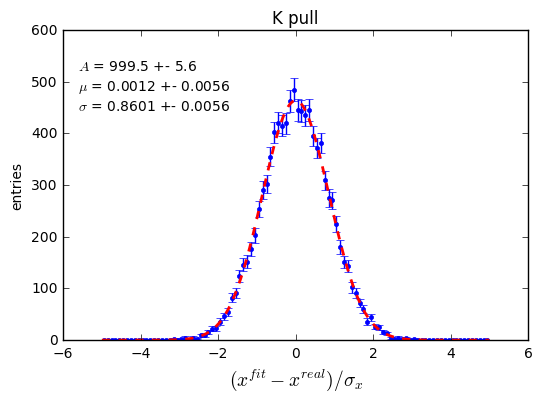

In [7]:
pull_K = pull_list[:,1]
h_k = np.histogram(pull_K,bins=100,range=[-lim,lim])
fit_k = ff.fit_gauss(h_k[1][:-1] + np.diff(h_k[1])/2.,h_k[0],[100,0,1])
res_k = [fit_k[0], 0]
res_k[1] = np.sqrt(np.diag(fit_k[1]))

plt.errorbar(h_k[1][:-1] + np.diff(h_k[1])/2.,h_k[0],h_k[0]**0.5,marker='.',linestyle='None')
plt.plot(xp, fun(xp,res_k[0][0],res_k[0][1],res_k[0][2]),linewidth=2,color='red',linestyle='--')
plt.figtext(0.15,0.8, ('$A$ = %0.1f +- %0.1f' % (res_k[0][0] , res_k[1][0])))
plt.figtext(0.15,0.75, ('$\mu$ = %0.4f +- %0.4f' % (res_k[0][1] , res_k[1][1])))
plt.figtext(0.15,0.7, ('$\sigma$ = %0.4f +- %0.4f' % (res_k[0][2] , res_k[1][2])))
plt.title('K pull')
plt.xlabel(r'$({x^{fit}-x^{real}})/{\sigma_x}$',fontsize=14)
plt.ylabel('entries')
plt.savefig("../Outputs/K_pull.pdf")

/home/brais/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:583: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/home/brais/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:584: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


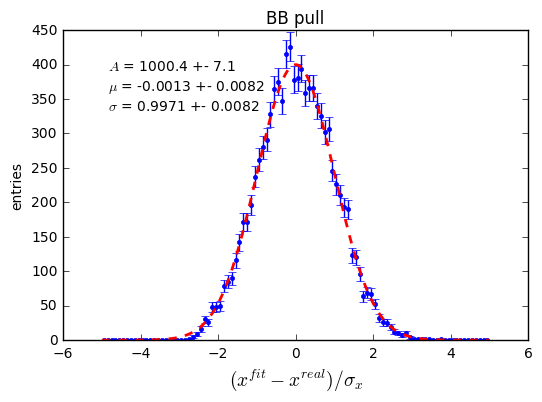

In [8]:
pull_bb = pull_list[:,4]
h_bb = np.histogram(pull_bb,bins=100,range=[-lim,lim])
fit_bb = ff.fit_gauss(h_bb[1][:-1] + np.diff(h_bb[1])/2.,h_bb[0],[100,0,1])
res_bb = [fit_bb[0], 0]
res_bb[1] = np.sqrt(np.diag(fit_bb[1]))

plt.errorbar(h_bb[1][:-1] + np.diff(h_bb[1])/2.,h_bb[0],h_bb[0]**0.5,marker='.',linestyle='None')
plt.plot(xp, fun(xp,res_k[0][0],res_k[0][1],res_bb[0][2]),linewidth=2,color='red',linestyle='--')
plt.figtext(0.2,0.8, ('$A$ = %0.1f +- %0.1f' % (res_bb[0][0] , res_bb[1][0])))
plt.figtext(0.2,0.75, ('$\mu$ = %0.4f +- %0.4f' % (res_bb[0][1] , res_bb[1][1])))
plt.figtext(0.2,0.7, ('$\sigma$ = %0.4f +- %0.4f' % (res_bb[0][2] , res_bb[1][2])))
plt.title('BB pull')
plt.xlabel(r'$({x^{fit}-x^{real}})/{\sigma_x}$',fontsize=14)
plt.ylabel('entries')
plt.savefig("../Outputs/BB_pull.pdf")

# mean and sigma plots

In [9]:
fi = tb.open_file("../Data/pull_data_1000.h5", "r")
pull_list = fi.root.pull_list[:]
mean_list = fi.root.mean_list[:]
errr_list = fi.root.errr_list[:]
actn_list = fi.root.actn_list[:]

580.217476906 +- 20.4601554369      576.344971988


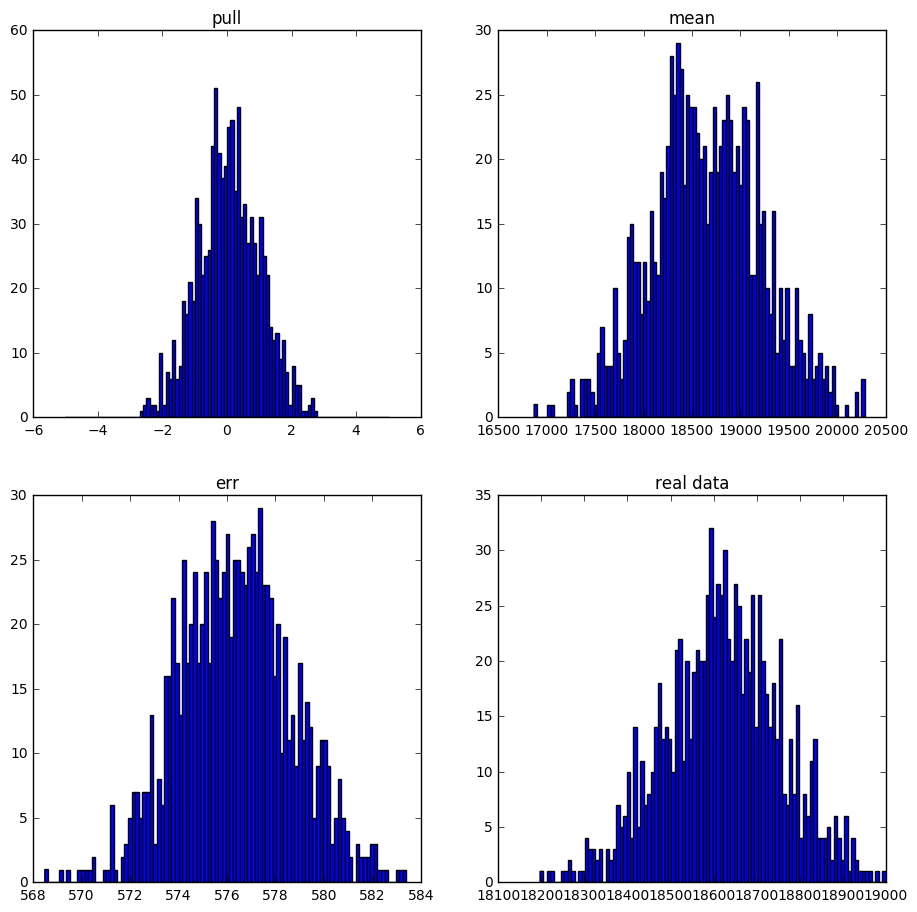

In [31]:
isotope = 0
plt.gcf().set_size_inches(11,11)
plt.subplot(2,2,1)
a1 = plt.hist(pull_list[:,isotope],range=[-5,5],bins=100)
plt.title('pull')
plt.subplot(2,2,2)
a2 = plt.hist(mean_list[:,isotope],bins=100)
plt.title('mean')
plt.subplot(2,2,3)
a3 = plt.hist(errr_list[:,isotope],bins=100)
plt.title('err')
plt.subplot(2,2,4)
a4 = plt.hist(actn_list[:,isotope],bins=100)
plt.title('real data')


fit_a2 = ff.fit_gauss(a2[1][:-1] + np.diff(a2[1])/2.,a2[0],[20,18500,500])
print(fit_a2[0][2],'+-',fit_a2[1][2,2]**0.5, '    ',np.mean(errr_list[:,isotope]))

608.400191022 +- 20.1690393752      629.363475445


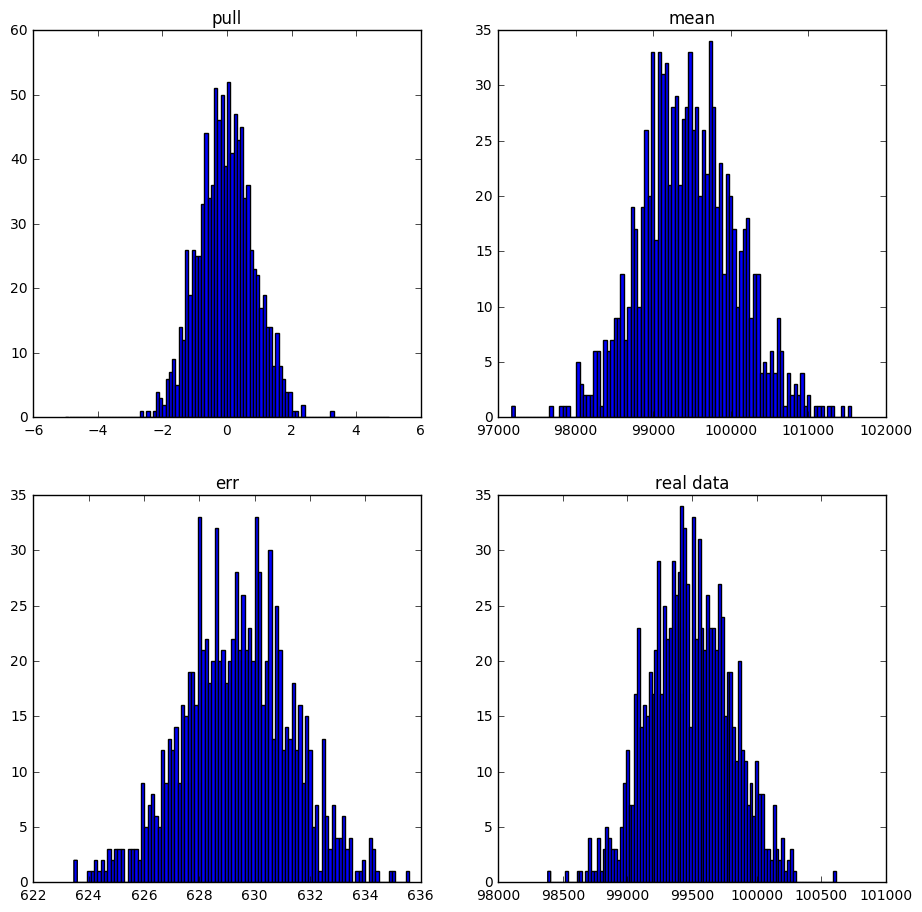

In [32]:
isotope = 1
plt.gcf().set_size_inches(11,11)
plt.subplot(2,2,1)
a1 = plt.hist(pull_list[:,isotope],range=[-5,5],bins=100)
plt.title('pull')
plt.subplot(2,2,2)
a2 = plt.hist(mean_list[:,isotope],bins=100)
plt.title('mean')
plt.subplot(2,2,3)
a3 = plt.hist(errr_list[:,isotope],bins=100)
plt.title('err')
plt.subplot(2,2,4)
a4 = plt.hist(actn_list[:,isotope],bins=100)
plt.title('real data')


fit_a2 = ff.fit_gauss(a2[1][:-1] + np.diff(a2[1])/2.,a2[0],[30,100000,600])
print(fit_a2[0][2],'+-',fit_a2[1][2,2]**0.5, '    ',np.mean(errr_list[:,isotope]))

116.322247062 +- 3.61690485928      109.46442347


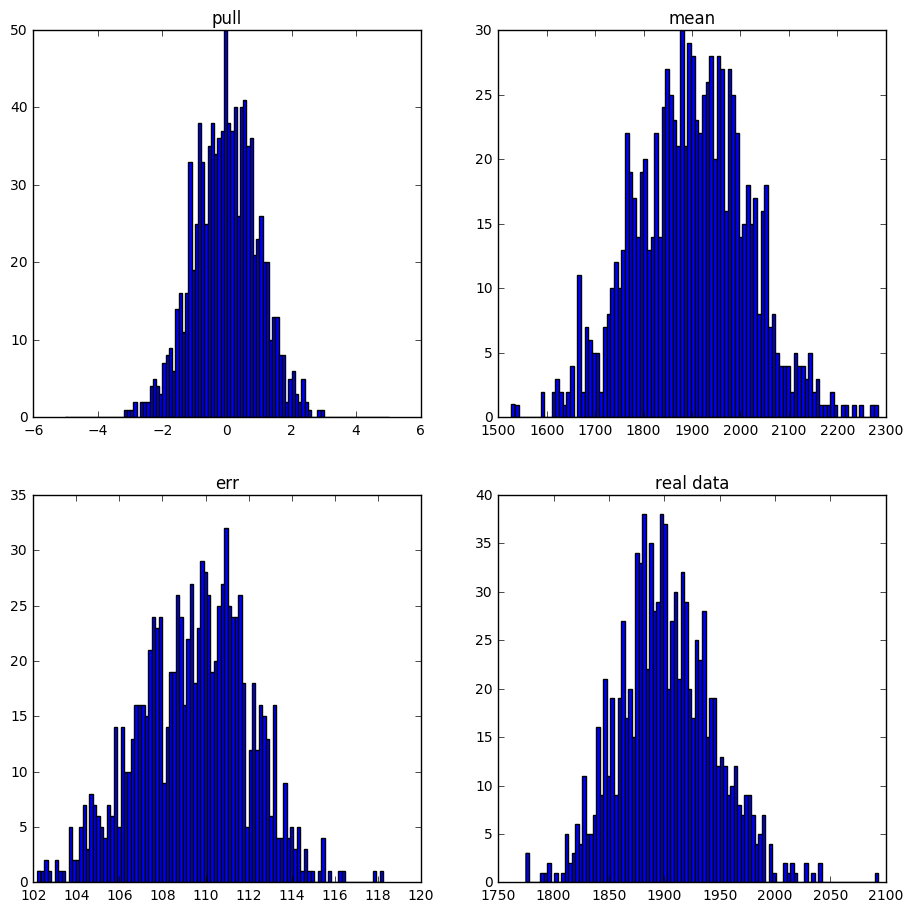

In [33]:
isotope = 2
plt.gcf().set_size_inches(11,11)
plt.subplot(2,2,1)
a1 = plt.hist(pull_list[:,isotope],range=[-5,5],bins=100)
plt.title('pull')
plt.subplot(2,2,2)
a2 = plt.hist(mean_list[:,isotope],bins=100)
plt.title('mean')
plt.subplot(2,2,3)
a3 = plt.hist(errr_list[:,isotope],bins=100)
plt.title('err')
plt.subplot(2,2,4)
a4 = plt.hist(actn_list[:,isotope],bins=100)
plt.title('real data')


fit_a2 = ff.fit_gauss(a2[1][:-1] + np.diff(a2[1])/2.,a2[0],[30,1900,110])
print(fit_a2[0][2],'+-',fit_a2[1][2,2]**0.5, '    ',np.mean(errr_list[:,isotope]))

649.668528746 +- 21.7501075111      643.49934172


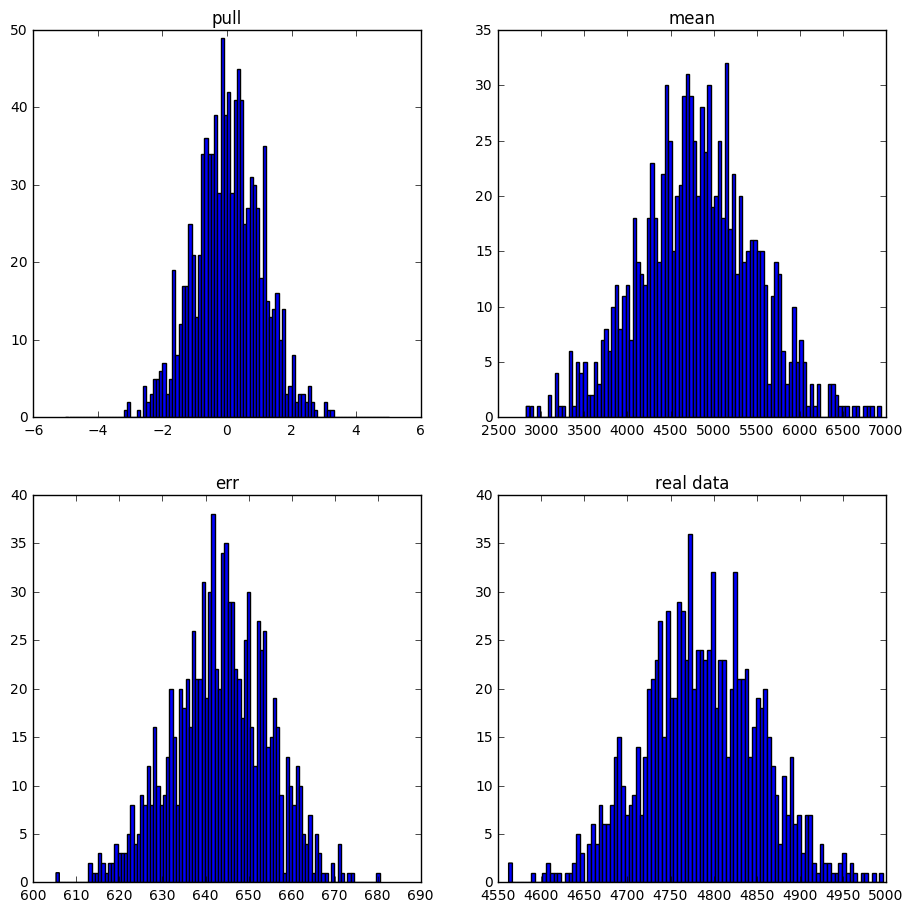

In [34]:
isotope = 3
plt.gcf().set_size_inches(11,11)
plt.subplot(2,2,1)
a1 = plt.hist(pull_list[:,isotope],range=[-5,5],bins=100)
plt.title('pull')
plt.subplot(2,2,2)
a2 = plt.hist(mean_list[:,isotope],bins=100)
plt.title('mean')
plt.subplot(2,2,3)
a3 = plt.hist(errr_list[:,isotope],bins=100)
plt.title('err')
plt.subplot(2,2,4)
a4 = plt.hist(actn_list[:,isotope],bins=100)
plt.title('real data')


fit_a2 = ff.fit_gauss(a2[1][:-1] + np.diff(a2[1])/2.,a2[0],[30,5000,600])
print(fit_a2[0][2],'+-',fit_a2[1][2,2]**0.5, '    ',np.mean(errr_list[:,isotope]))

600.017213375 +- 19.7833186476      593.078075129


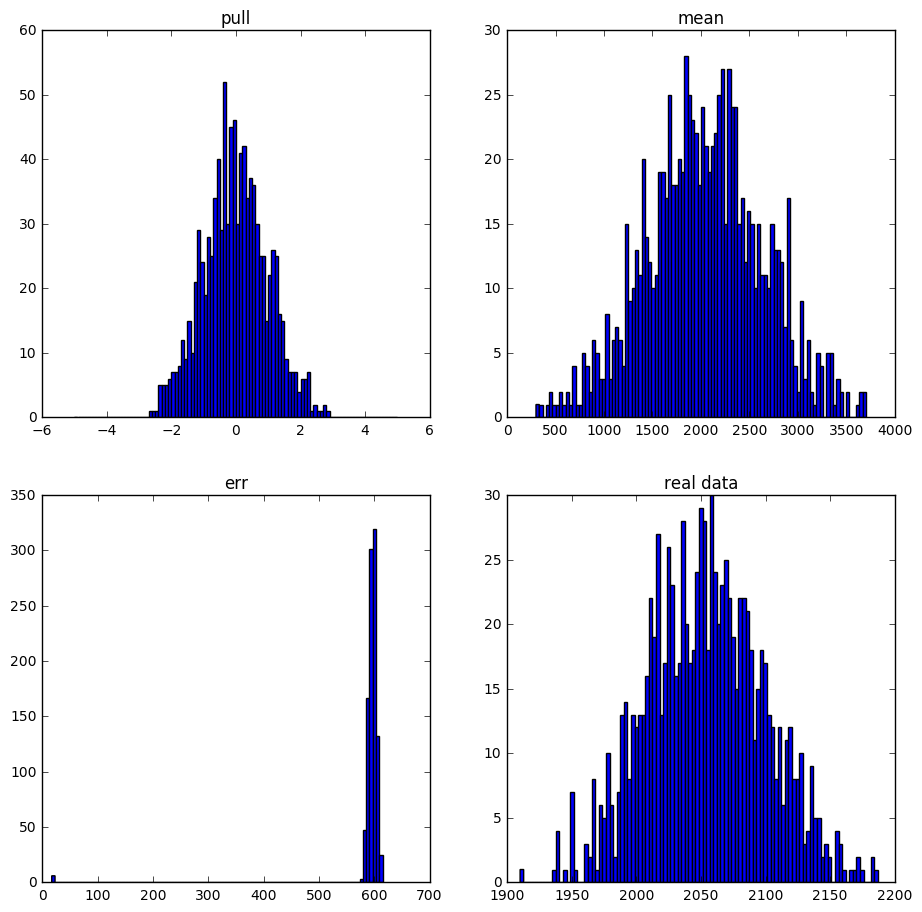

In [35]:
isotope = 4
plt.gcf().set_size_inches(11,11)
plt.subplot(2,2,1)
a1 = plt.hist(pull_list[:,isotope],range=[-5,5],bins=100)
plt.title('pull')
plt.subplot(2,2,2)
a2 = plt.hist(mean_list[:,isotope],bins=100)
plt.title('mean')
plt.subplot(2,2,3)
a3 = plt.hist(errr_list[:,isotope],bins=100)
plt.title('err')
plt.subplot(2,2,4)
a4 = plt.hist(actn_list[:,isotope],bins=100)
plt.title('real data')


fit_a2 = ff.fit_gauss(a2[1][:-1] + np.diff(a2[1])/2.,a2[0],[30,2000,600])
print(fit_a2[0][2],'+-',fit_a2[1][2,2]**0.5, '    ',np.mean(errr_list[:,isotope]))

(array([  1.99333164e+03,   5.34933871e-01,   2.48502677e+00]),
 array([[  2.27637283e+02,   8.13191092e-07,   1.89193792e-01],
        [  8.13191092e-07,   4.71714702e-04,   1.89852022e-09],
        [  1.89193792e-01,   1.89852022e-09,   4.71722046e-04]]))

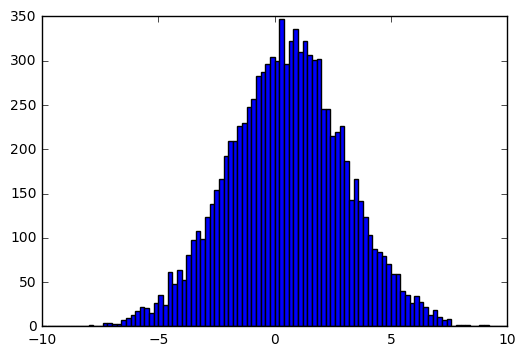

In [44]:
ap = plt.hist(np.random.normal(0.5,2.5,10000),range=[-10,10],bins=100)
ff.fit_gauss(ap[1][:-1] + np.diff(ap[1])/2.,ap[0],[10000,0,6])

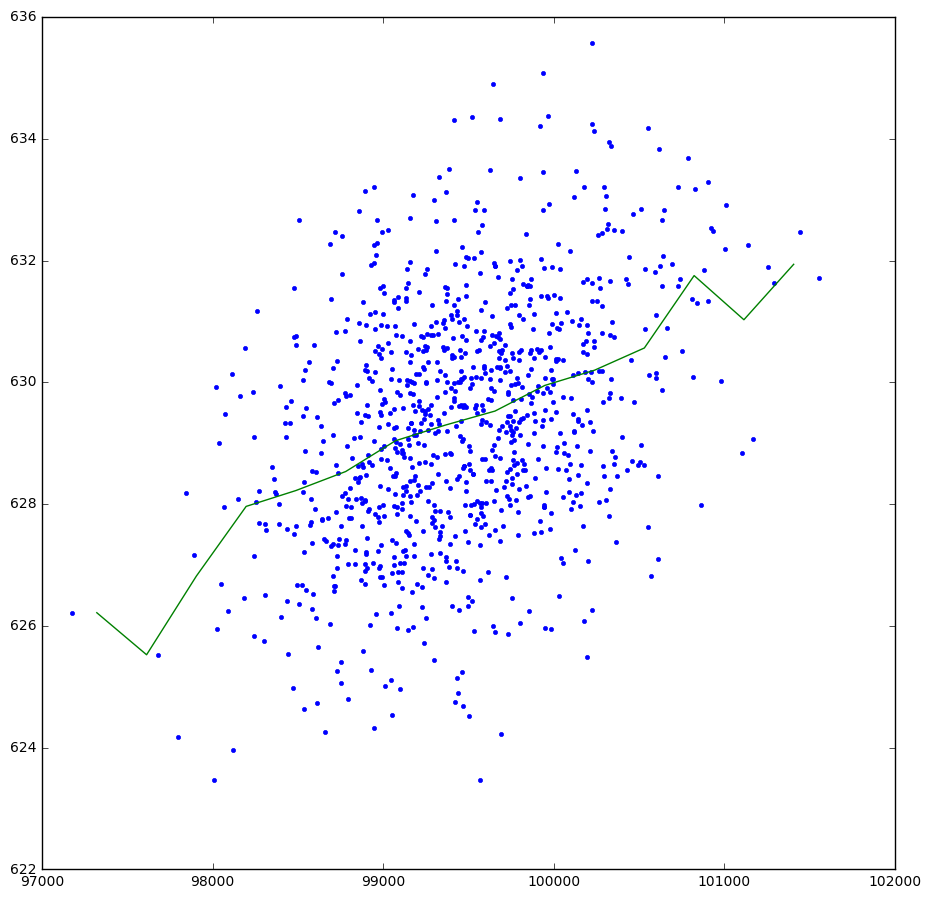

In [69]:
isotope = 1
plt.gcf().set_size_inches(11,11)
plt.plot(mean_list[:,isotope],errr_list[:,isotope],'.')
s = ff.profileX(mean_list[:,isotope],errr_list[:,isotope],15)
plt.plot(s[0],s[1])